## Clean up dataset

In [2]:
%%bash
ls ../data/recipe-ingredients-dataset

README.md
test.json
train.json


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Dataset

In [4]:
data_path = "../data/recipe-ingredients-dataset/train.json"

In [5]:
df_raw = pd.read_json(data_path)

In [6]:
df = df_raw.copy()
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [7]:
df.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [8]:
def flatten_to_unique(ing_arr):
    
    ret = [item for sublist in ing_arr for item in sublist]
    
    ret = list(set(ret))
    
    ret.sort()

    for x in range(10):
        for i in ret:
            if ('(' in i) or ('%' in i) or (')' in i) or ('oz.' in i) or ('lb.' in i):
                ret.remove(i)
                print(i)
    
    ret = [i.lower() for i in ret]
    
    return ret

In [9]:
list_of_ingredients = flatten_to_unique(df.ingredients.values.tolist() )

(    oz.) tomato sauce
(10 oz.) frozen chopped spinach
(14 oz.) sweetened condensed milk
(15 oz.) refried beans
1% low-fat chocolate milk
1% low-fat milk
2% low fat cheddar chees
2% lowfat greek yogurt
2% reduced-fat milk
33% less sodium cooked deli ham
33% less sodium ham
40% less sodium taco seasoning
95% lean ground beef
KNUDSEN 2% Milkfat Low Fat Cottage Cheese
Yoplait® Greek 2% caramel yogurt
asafetida (powder)
besan (flour)
evaporated low-fat 2% milk
flour tortillas (not low fat)
hing (powder)
kielbasa (not low fat)
low sodium 96% fat free ham
(   oz.) tomato paste
(14.5 oz.) diced tomatoes
1% low-fat cottage cheese
2% low-fat cottage cheese
25% less sodium chicken broth
33% less sodium smoked fully cooked ham
KRAFT Mexican Style 2% Milk Finely Shredded Four Cheese
(10 oz.) frozen chopped spinach, thawed and squeezed dry
2 1/2 to 3 lb. chicken, cut into serving pieces
33% less sodium cooked ham
1% low-fat buttermilk
40% less sodium taco seasoning mix
2% milk shredded mozzarella c

In [10]:
df_ingredient = pd.DataFrame(list_of_ingredients, columns=['Ingredient'])
df_ingredient = df_ingredient.reset_index()
df_ingredient.rename(columns = {'index': 'pos'}, inplace=True)
df_ingredient = df_ingredient.set_index('Ingredient')
df_ingredient.head()

,pos
Ingredient,
7 up,0
"8 ounc ziti pasta, cook and drain",1
a taste of thai rice noodles,2
accent seasoning,3
adobo all purpose seasoning,4


In [11]:
total_len = len(df_ingredient)

In [12]:
def vectorized_recipe(recipe):
    
    arr_out = np.zeros(total_len)
    non_zero_pos = []
    for i in recipe:
        try:
            non_zero_pos.append(
                df_ingredient.loc[i.lower()].pos
            )
        except:
            pass
        
    for i in non_zero_pos:
        arr_out[i] = 1

    return arr_out

In [13]:
vectorized_recipe(df.iloc[0].ingredients)

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
df['vectorized_ingredients'] = df['ingredients'].apply(vectorized_recipe)

In [15]:
df_vectorized = pd.DataFrame( np.array( df.vectorized_ingredients.values.tolist() ) )

In [16]:
df_vectorized['id'] = df.id

In [17]:
df_vectorized = df_vectorized.astype(int)

In [18]:
np.save("ingredient-matrix.npy", np.array( df.vectorized_ingredients.values.tolist() ) )

In [19]:
np.save("ingredient-matrix-id.npy",  df.id.values )

In [20]:
df_vectorized = df_vectorized.set_index('id')

In [21]:
df_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,...,6669,6670,6671,6672,6673,6674,6675,6676,6677,6678
id,,,,,,,,,,,,,,,,,,,,,
10259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
vectorized_recipe_standardized = StandardScaler().fit_transform(df_vectorized.values)

/Users/leima/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
vectorized_recipe_standardized

array([[-0.01002887, -0.00501425, -0.00501425, ..., -0.02701206,
        -0.15146355, -0.00709131],
       [-0.01002887, -0.00501425, -0.00501425, ..., -0.02701206,
        -0.15146355, -0.00709131],
       [-0.01002887, -0.00501425, -0.00501425, ..., -0.02701206,
        -0.15146355, -0.00709131],
       ...,
       [-0.01002887, -0.00501425, -0.00501425, ..., -0.02701206,
        -0.15146355, -0.00709131],
       [-0.01002887, -0.00501425, -0.00501425, ..., -0.02701206,
        -0.15146355, -0.00709131],
       [-0.01002887, -0.00501425, -0.00501425, ..., -0.02701206,
        -0.15146355, -0.00709131]])

In [25]:
from sklearn.decomposition import PCA


In [26]:
pca = PCA(n_components=2)

In [27]:
principalComponents = pca.fit_transform(vectorized_recipe_standardized)


In [28]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

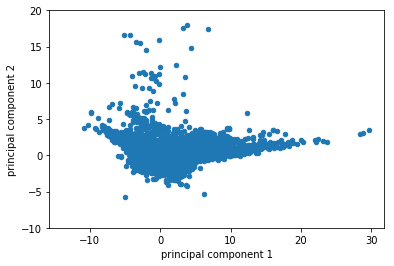

In [29]:
principalDf.plot.scatter('principal component 1', 'principal component 2')
plt.ylim([-10,20])
plt.show()

Construct the vector for each ingredients

In [30]:
pure_ingredient_vec = np.diag( np.ones(total_len) )

In [31]:
mu_vec = np.mean(df_vectorized.values, axis=0)

For each ingredient, we can calculate the corresponding dimension-reduced vectors

In [32]:
pca.explained_variance_ratio_ 

array([0.00099328, 0.0009424 ])

In [33]:
pure_ingredient_vec_reduced = np.dot( pure_ingredient_vec - mu_vec, pca.components_.T  )

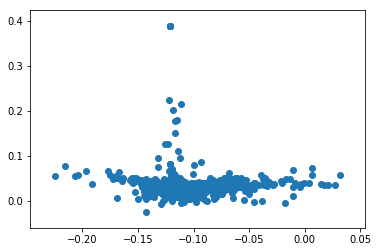

In [34]:
plt.scatter( pure_ingredient_vec_reduced.T[0], pure_ingredient_vec_reduced.T[1] )